## Diabetes Classification using K Nearest Neighbors
Import all the necessary libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#### Read the training data set in diabetes_Xtrain (features) , diabetes_Ytrain(labels) and test data set in diabetes_Xtest

In [3]:
diabetes_Xtrain = pd.read_csv("diabetes_XTrain.csv")
diabetes_Ytrain = pd.read_csv("diabetes_YTrain.csv")
diabetes_Xtest = pd.read_csv("diabetes_Xtest.csv")

In [4]:
diabetes_Xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [9]:
diabetes_Ytrain.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [7]:
diabetes_Xtrain.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#### Visualising the number of positive class and negative class

<AxesSubplot:xlabel='Outcome', ylabel='count'>

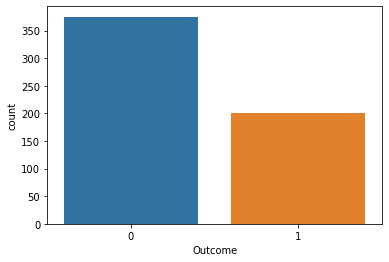

In [10]:
sns.countplot(x="Outcome", data = diabetes_Ytrain)

In [11]:
print(diabetes_Xtrain.shape)
print(diabetes_Ytrain.shape)
print(diabetes_Xtest.shape)

(576, 8)
(576, 1)
(192, 8)


In [27]:
scale = StandardScaler()

In [29]:
x_train , x_test, y_train, y_test = train_test_split(diabetes_Xtrain , diabetes_Ytrain, random_state = 21)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(432, 8)
(144, 8)
(432, 1)
(144, 1)


## Scaling 
Scaling the training data set and test data set using object of standard scaler

In [33]:
scale_xtrain = scale.fit_transform(x_train)
scale_xtest = scale.fit_transform(x_test)

In [41]:
y_train = y_train.to_numpy().reshape(432,)
y_test = y_test.to_numpy().reshape(144,)

In [49]:
print(type(scale_xtrain))
print(type(scale_xtest))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [50]:
print(scale_xtrain.shape)
print(scale_xtest.shape)
print(y_train.shape)
print(y_test.shape)

(432, 8)
(144, 8)
(432,)
(144,)


In [55]:
print(y_test)

[1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]


## Modelling
 Creating object called dummy and fitting our data and find out the accuracy

In [74]:
dummy = KNeighborsClassifier()

In [75]:
dummy.fit(scale_xtrain, y_train)

KNeighborsClassifier()

In [77]:
dummy_y_predict = dummy.predict(scale_xtest)

In [78]:
dummy_result = classification_report(y_test, dummy_y_predict)

We get accuracy of 71% with low precision and low recall

In [79]:
print(dummy_result)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        96
           1       0.58      0.44      0.50        48

    accuracy                           0.71       144
   macro avg       0.67      0.64      0.65       144
weighted avg       0.69      0.71      0.70       144



## Hyper parameter tuning

We try to improve our accuracy by selecting the the most optimal value of hyper paramters
In case of K nearest neighbors , these are "n_neighbors", "leaf_size" and "p"

In [56]:
knn = KNeighborsClassifier()

In [59]:
parameters = {'n_neighbors': list(range(1,50)),  
              'p': [1,2], 
              'leaf_size': list(range(1,50))
             }

In [60]:
model = GridSearchCV(knn,parameters,cv = 5)

In [70]:
model.fit(scale_xtrain,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [72]:
model.best_params_

{'leaf_size': 1, 'n_neighbors': 35, 'p': 2}

In [80]:
y_predict = model.predict(scale_xtest)

In [81]:
result = classification_report(y_test, y_predict)

In [82]:
print(result)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        96
           1       0.81      0.35      0.49        48

    accuracy                           0.76       144
   macro avg       0.78      0.66      0.67       144
weighted avg       0.77      0.76      0.72       144



##### We got accuracy of 76% . That means acuracy improved by 5% by choosing the correct hyper parameters

### Testing on completely unforseen data

In [87]:
scale_diabetes_xtest = scale.fit_transform(diabetes_Xtest)

In [88]:
submission = model.predict(scale_diabetes_xtest)

In [93]:
submission_df = pd.DataFrame(submission, columns=["Outcome"])

In [94]:
submission_df.describe()

,Outcome
count,192.000000
mean,0.192708
std,0.395457
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [95]:
submission_df.to_csv("submission_csv",index=False)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

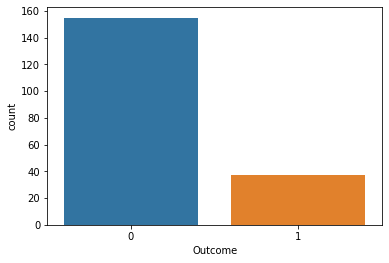

In [96]:
sns.countplot(x="Outcome",data=submission_df)

##### The unforeseen data achieved acuuracy of 77% when submitted to the coding blocks tester